# Gold Price Prediction

### Importing Python Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pickle

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

### Reading CSV File

In [2]:
df=pd.read_csv("gold_price.csv")

In [3]:
df.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


### About Data
#### Date - Trading Date
#### SPX - S&P 500 Index Value
#### GLD - Gold Price
#### USO - US Oil Fund Price
#### SLV - Price of Silver Shares
#### EUR/USD - Euro to US Dollar Exchange rate

### Data Preprocessing

#### Date column is in Mixed format

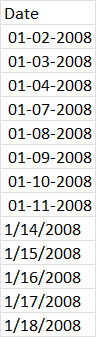

#### Converting Date column format to DD/MM/YYY

In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)
df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')

#### After Converting

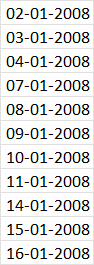

In [5]:
df.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [6]:
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### Dataset is clear now

### Univariate Analysis

In [7]:
# Differentiating Quantative and Qualitative Columns
from Univariate import CentralTendency
quan,qual=CentralTendency.quanQual(df)

Quantative Columns :  ['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']

Qualitative Columns : ['Date']


#### Customized Descriptive Analysis

In [8]:
descriptive=CentralTendency.Univariate(quan,df)

In [9]:
descriptive

,SPX,GLD,USO,SLV,EUR/USD
Mean,1654.315776,122.732875,31.842221,20.084997,1.283653
Median,1551.434998,120.580002,33.869999,17.2685,1.303297
Mode,1178.099976,115.940002,10.11,16.15,1.437298
Q1:25%,1239.874969,109.725,14.38,15.57,1.171313
Q2:50%,1551.434998,120.580002,33.869999,17.2685,1.303297
Q3:75%,2073.01007,132.840004,37.827501,22.8825,1.369971
99%,2748.36748,173.494404,106.696399,39.8255,1.574858
Q4:100%,2872.870117,184.589996,117.480003,47.259998,1.598798
IQR,833.135101,23.115004,23.447501,7.3125,0.198658
1.5Rule,1249.702652,34.672506,35.171252,10.968749,0.297987


In [10]:
# Finding the Outlier's Columns
Lesser,Greater=CentralTendency.findOutliers(descriptive)

Lesser Outliers Columns :  ['GLD']

Greater Outliers Columns :  ['GLD', 'USO', 'SLV']


### Creating Plots to understand the Dataset

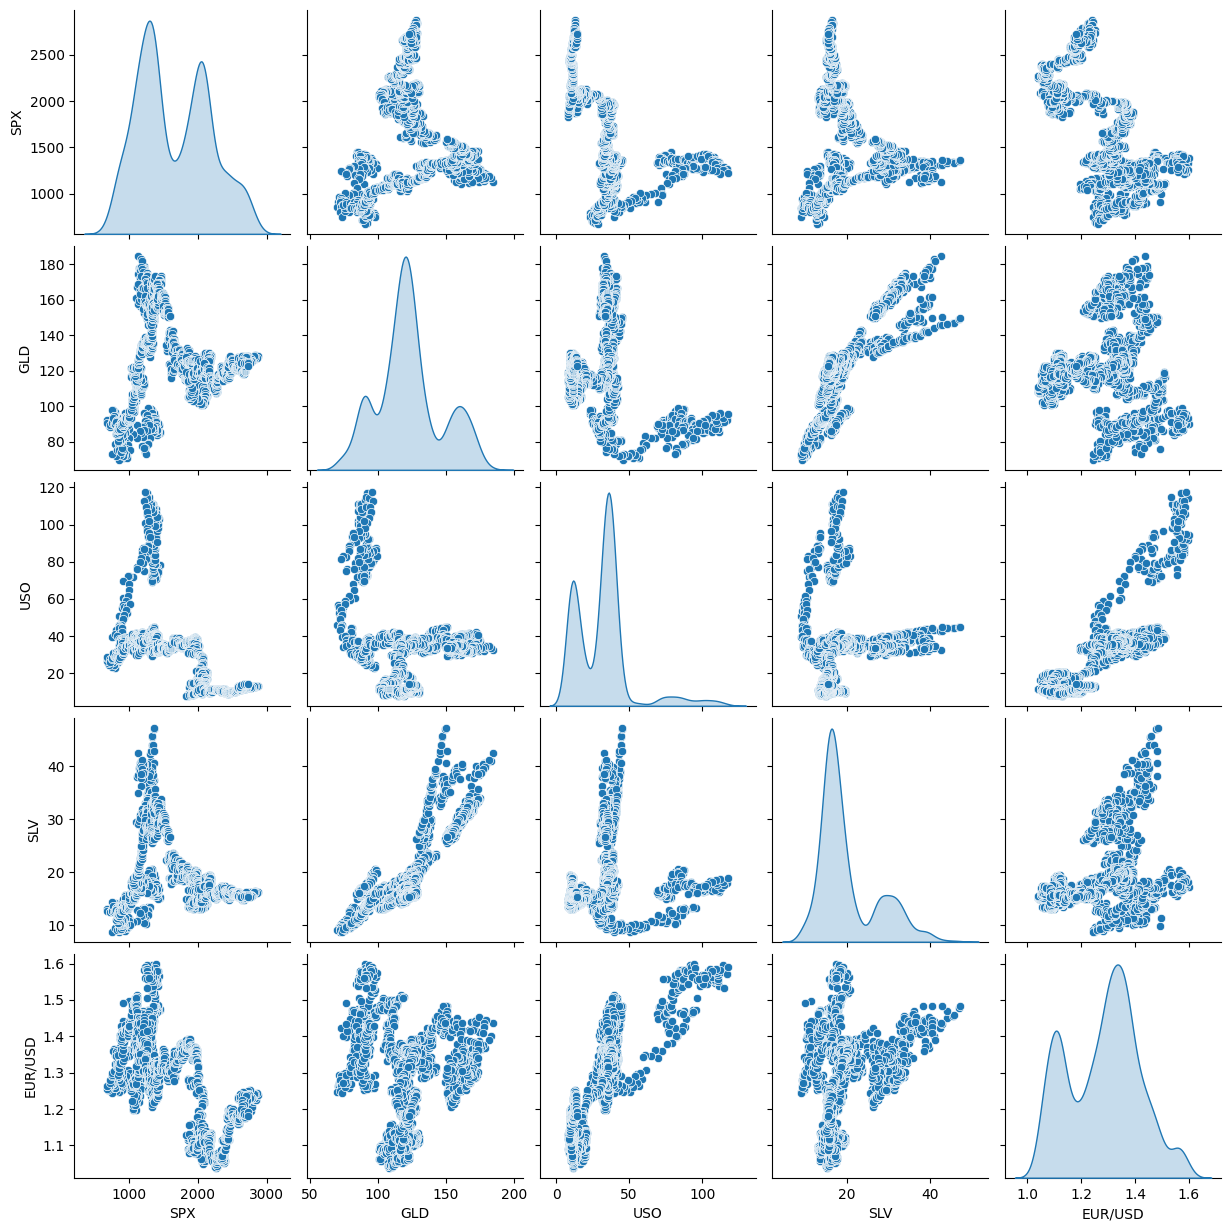

In [11]:
sns.pairplot(df,diag_kind='kde',kind='scatter',palette='husl')
plt.show()

<Axes: xlabel='GLD', ylabel='Density'>

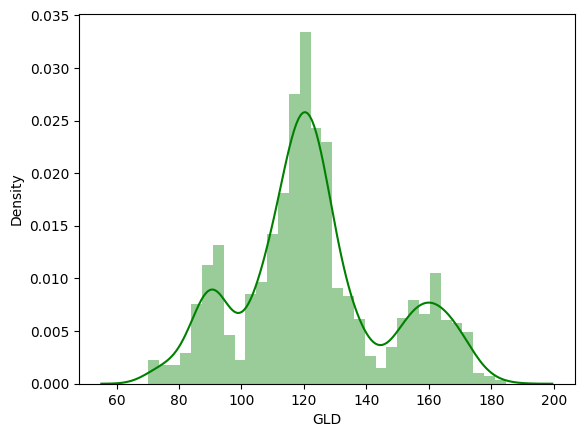

In [12]:
sns.distplot(df['GLD'],color='green')

<Axes: xlabel='SPX', ylabel='Density'>

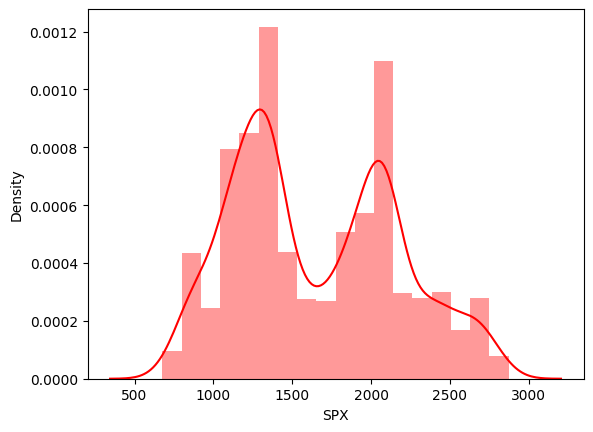

In [13]:
sns.distplot(df['SPX'],color='red')

<Axes: xlabel='USO', ylabel='Density'>

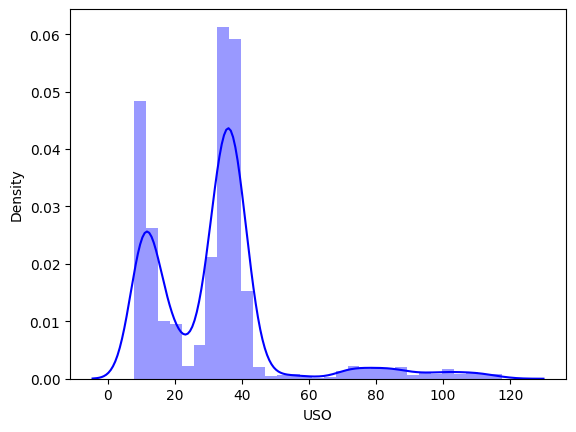

In [14]:
sns.distplot(df['USO'],color='blue')

<Axes: xlabel='SLV', ylabel='Density'>

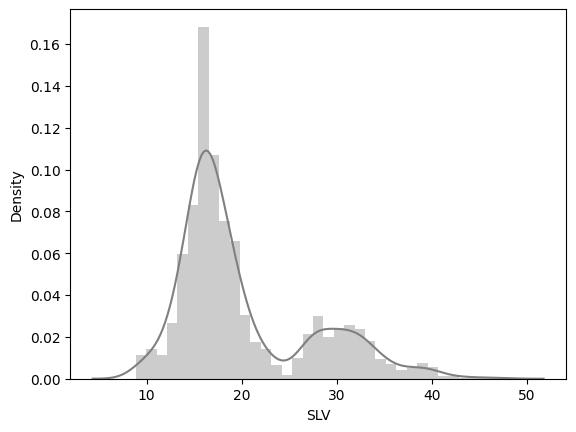

In [15]:
sns.distplot(df['SLV'],color='grey')

#### Comparison of GLD, SPX, USO & SLV using Normalization

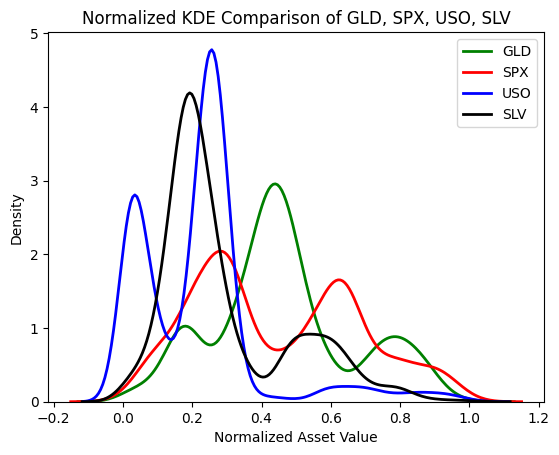

In [16]:
# Normalize each column to [0,1] for comparability
scaler = MinMaxScaler()
normalized = pd.DataFrame(
    scaler.fit_transform(df[['GLD','SPX','USO','SLV']]),
    columns=['GLD','SPX','USO','SLV']
)
# Overlay KDE plots
sns.kdeplot(normalized['GLD'], color='green', label='GLD', linewidth=2)
sns.kdeplot(normalized['SPX'], color='red', label='SPX', linewidth=2)
sns.kdeplot(normalized['USO'], color='blue', label='USO', linewidth=2)
sns.kdeplot(normalized['SLV'], color='black', label='SLV', linewidth=2)

# Labels and legend
plt.xlabel("Normalized Asset Value")
plt.ylabel("Density")
plt.title("Normalized KDE Comparison of GLD, SPX, USO, SLV")
plt.legend()
plt.show()


### BiVariate Analysis

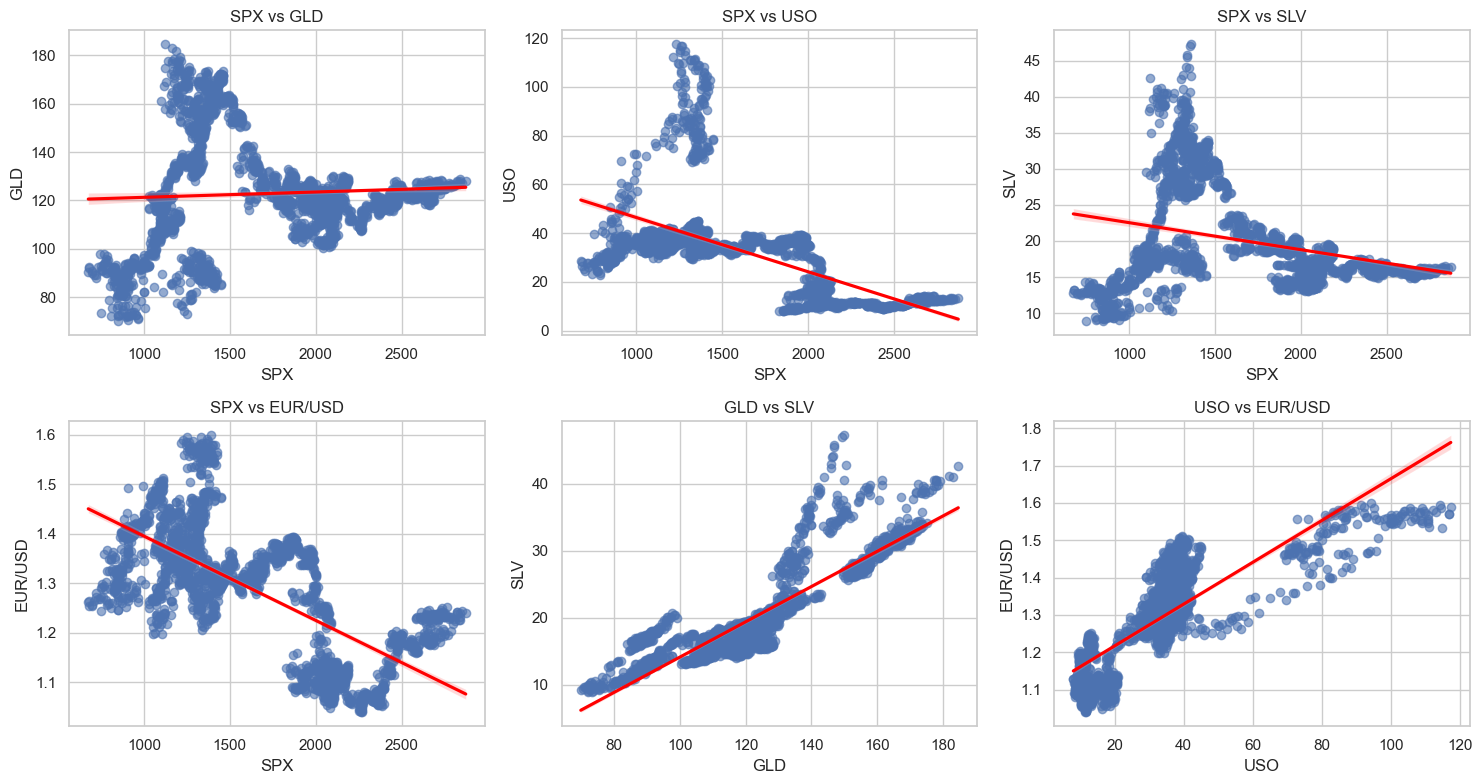

In [17]:
# Set style
sns.set(style="whitegrid")
# Define pairs for bivariate analysis 
pairs = [ ("SPX", "GLD"), 
         ("SPX", "USO"), 
         ("SPX", "SLV"), 
         ("SPX", "EUR/USD"), 
         ("GLD", "SLV"), 
         ("USO", "EUR/USD") ]

# Create subplots 
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, (x, y) in enumerate(pairs): 
    sns.regplot(x=df[x], y=df[y], ax=axes[i], scatter_kws={'alpha':0.6}, line_kws={'color':'red'}) 
    axes[i].set_title(f"{x} vs {y}") 
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y) 
    
plt.tight_layout() 
plt.show()

#### Finding Correlation Matrix

In [18]:
correlation = df[quan].corr()

In [19]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


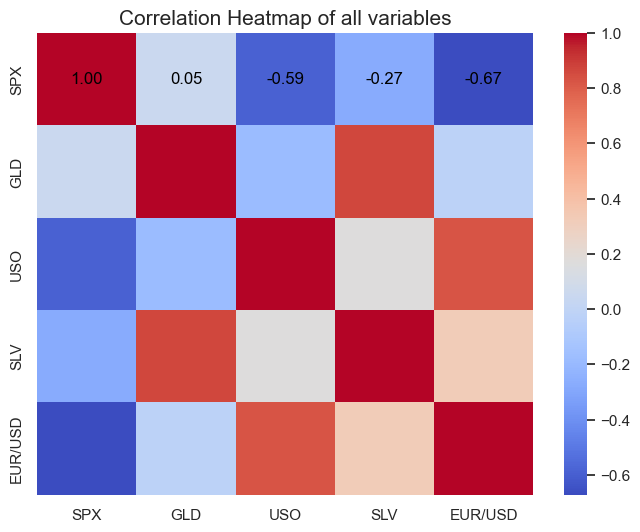

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"color": "black"})
plt.title("Correlation Heatmap of all variables", fontsize=15)
plt.show()

### Splitting Input and Output variables

In [21]:
indep = df.drop(['Date','GLD'],axis=1)
dep = df['GLD']

In [22]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,02-01-2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,03-01-2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,04-01-2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,07-01-2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,08-01-2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,08-05-2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,09-05-2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,10-05-2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,14-05-2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [23]:
indep

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [24]:
dep

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

### Splitting Training and TestSet

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(indep, dep, test_size = 0.3, random_state=0)

### Applying Standardization

In [26]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Dumping the scaler for using the same in final model
sclrName = "sclr_for_rf.pkl"
pickle.dump(sc,open(sclrName, 'wb'))

In [27]:
X_train.shape

(1603, 4)

In [28]:
X_test.shape

(687, 4)

In [29]:
Y_train.shape

(1603,)

In [30]:
Y_test.shape

(687,)

## Implementing Support Vector Machine

In [31]:
sv_regressor=SVR(C=1000,kernel="sigmoid")
sv_regressor.fit(X_train,Y_train)

,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'sigmoid'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1000
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


In [32]:
Y_pred_sv=sv_regressor.predict(X_test)

In [33]:
from sklearn.metrics import r2_score
r_score=r2_score(Y_test,Y_pred_sv)
r_score

-1435337.5650742142

#### Poor R-Square value for SVM

## Implementing Random Forest

In [34]:
rf_regressor = RandomForestRegressor(n_estimators=100)

In [35]:

rf_regressor.fit(X_train,Y_train)

Y_pred_rf=rf_regressor.predict(X_test)

In [36]:
from sklearn.metrics import r2_score
rf_r_score=r2_score(Y_test,Y_pred_rf)
print("R squared error : ", rf_r_score)

R squared error :  0.9877171703783639


#### 98.93% R-Square value so comparing the Actual and Predicted Price

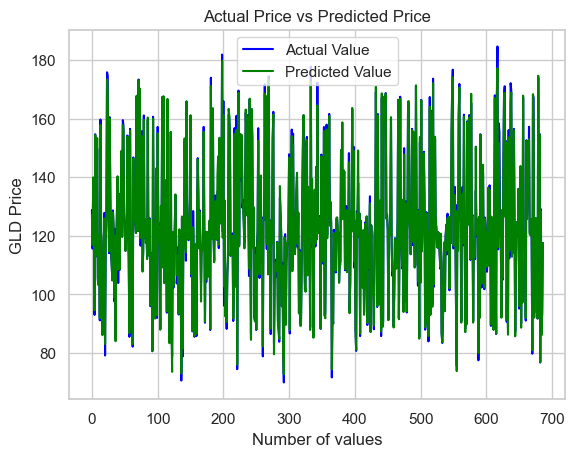

In [37]:
Y_test=list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(Y_pred_rf, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

## Implementing Decision Tree

In [38]:
regressor_dc=DecisionTreeRegressor(criterion='poisson', max_features='log2', splitter='random')
regressor_dc=regressor_dc.fit(X_train,Y_train)

In [39]:
Y_pred_dc=regressor_dc.predict(X_test)


dc_r_score=r2_score(Y_test,Y_pred_dc)
print("R squared error : ", dc_r_score)

R squared error :  0.9668437712365395


#### 97.78% R-Square value so comparing the Actual and Predicted Price

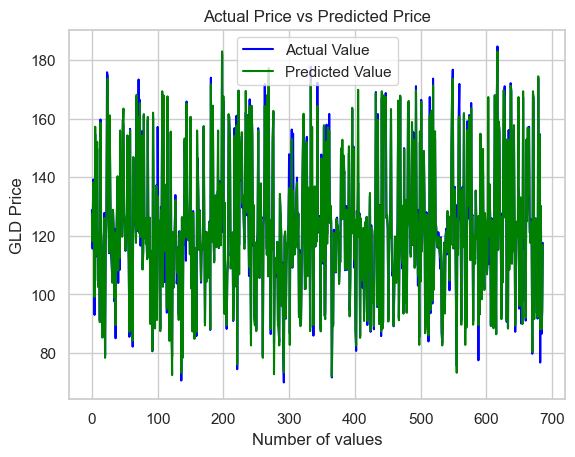

In [40]:
Y_test=list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(Y_pred_dc, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

## Conclusion:
### Random Forest Regressor is giving good score compared to SVM and Decision Tree..

## Feature Selection Methods
#### Below methods are explored

 Correlation Heatmap
 
 SelectKBest
 
 Recursive Feature Elimination with Linear Regression
 
 Random Forest Feature Importances
 
 Finally, Pipeline Method (SelectKBest + Linear Regression)

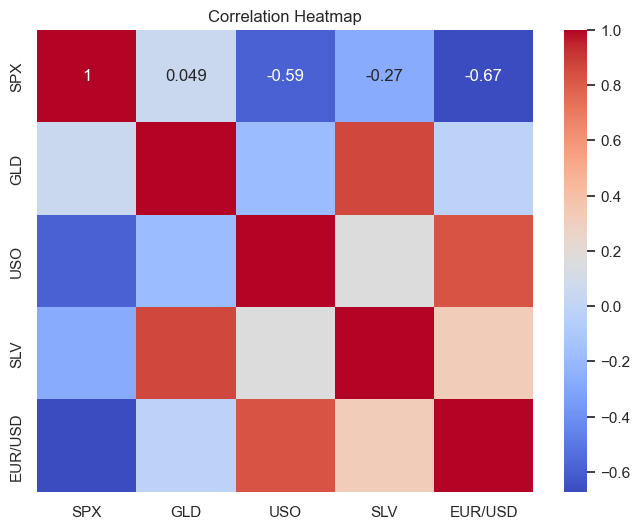

SelectKBest scores:
SPX: 5.58
USO: 82.32
SLV: 6902.63
EUR/USD: 1.36


RFE selected features: ['USO', 'SLV']

Random Forest feature importances:
    Feature  Importance
2      SLV    0.765511
0      SPX    0.169193
1      USO    0.035773
3  EUR/USD    0.029524

Pipeline selected features: ['USO', 'SLV']
Pipeline R^2 score on test set: 0.8587855140518816


In [41]:
X = df[['SPX','USO','SLV','EUR/USD']]
y = df['GLD']
feature_names = ['SPX','USO','SLV','EUR/USD']
X=sc.fit_transform(X)
# -----------------------------
# 2. Correlation Heatmap
# -----------------------------
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------
# 3. SelectKBest (Univariate)
# -----------------------------
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
print("SelectKBest scores:")
for feat, score in zip(feature_names, selector.scores_):
    print(f"{feat}: {score:.2f}")

# -----------------------------
# 4. Recursive Feature Elimination (RFE)
# -----------------------------
model = LinearRegression()
rfe = RFE(model, n_features_to_select=2)
rfe.fit(X, y)
selected_features = [f for f, s in zip(feature_names, rfe.support_) if s]
print("\n\nRFE selected features:", selected_features)

# -----------------------------
# 5. Random Forest Importance
# -----------------------------
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nRandom Forest feature importances:\n", importances)

# -----------------------------
# 6. Pipeline Example
# -----------------------------
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_regression, k=2)),
    ('model', LinearRegression())
])

# Keep feature names before converting to numpy
feature_names = ['SPX','USO','SLV','EUR/USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
pipeline.fit(X_train, y_train)

# Use feature_names with get_support()
selected_features = [f for f, s in zip(feature_names, 
                                       pipeline.named_steps['feature_selection'].get_support()) if s]

print("\nPipeline selected features:", selected_features)
print("Pipeline R^2 score on test set:", pipeline.score(X_test, y_test))


### Takeaway Points

Silver (SLV) is the best predictor of Gold (GLD). No matter which method we use, silver prices have the strongest link to gold.

Oil (USO) also matters, but less than silver. It shows up as the second most useful feature in several tests.

The S&P 500 (SPX) has some influence in the Random Forest model, but overall it’s not a strong predictor. It might only matter in more complex, non‑linear ways.

EUR/USD exchange rate doesn’t really help in predicting gold prices here.

A pipeline model that scales the data, picks the best features, and runs linear regression performs well, with an accuracy score (R²) of about 0.86.

All the methods agree: gold prices are mainly driven by silver, with oil playing a supporting role.

## Since feature selection produced weak scores, so Random Forest Regressor is chosen as the final model.

In [42]:
modelName="Gold_Price_Predictor.sav"
pickle.dump(rf_regressor,open(modelName, 'wb'))

In [43]:
sclr = pickle.load(open("sclr_for_rf.pkl","rb"))

model=pickle.load(open("Gold_Price_Predictor.sav","rb"))
X=[[1447.160034,78.470001,15.1800,1.471692]]
X = sclr.transform(X)
output=model.predict(X)
output

array([85.08309985])